In [ ]:
!pip install yfinance --quiet

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import time
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (22,5)

from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, precision_score
from datetime import date



In [ ]:
data = yf.Ticker("GOOGL")
data_hist = data.history(period="max")
data_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19 00:00:00-04:00,2.487584,2.588579,2.387085,2.496041,893181924,0.0,0.0
2004-08-20 00:00:00-04:00,2.512708,2.713456,2.500021,2.694301,456686856,0.0,0.0
2004-08-23 00:00:00-04:00,2.754999,2.822910,2.712710,2.721416,365122512,0.0,0.0
2004-08-24 00:00:00-04:00,2.767188,2.776144,2.576391,2.608729,304946748,0.0,0.0
2004-08-25 00:00:00-04:00,2.610968,2.686591,2.584102,2.636839,183772044,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-16 00:00:00-04:00,174.729996,176.940002,174.649994,176.770004,27389200,0.0,0.0
2025-06-17 00:00:00-04:00,175.699997,177.360001,174.580002,175.949997,24973000,0.0,0.0
2025-06-18 00:00:00-04:00,176.009995,176.559998,173.199997,173.320007,28707500,0.0,0.0


In [ ]:
print(f'The data has {data_hist.shape[0]} rows and {data_hist.shape[1]} columns')

The data has 5244 rows and 7 columns


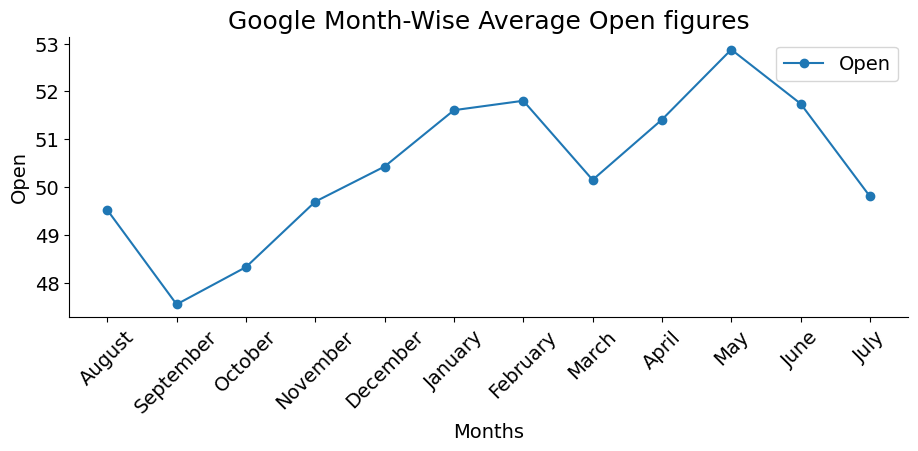

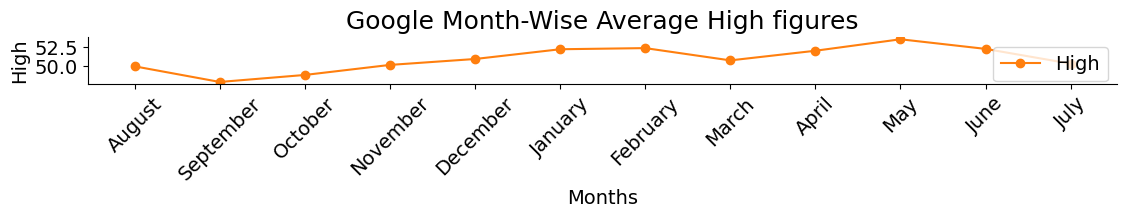

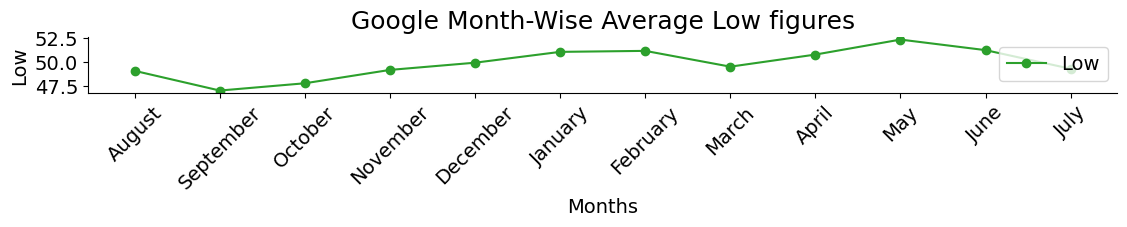

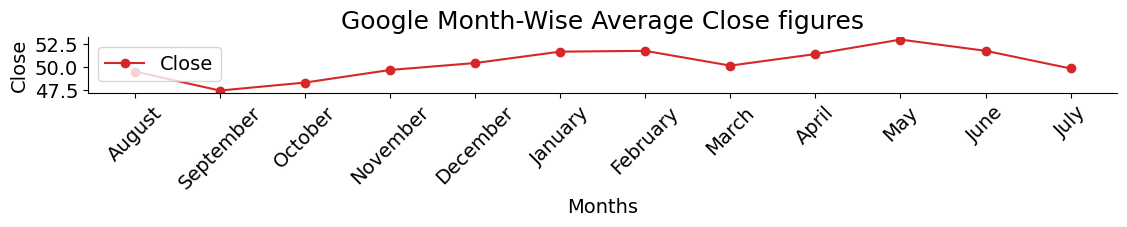

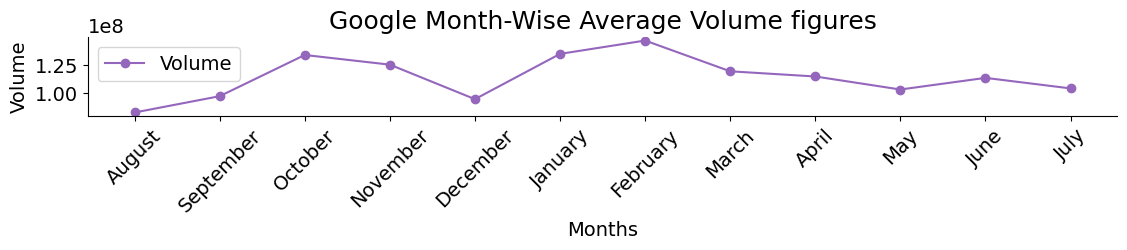

In [ ]:
colors = plt.rcParams["axes.prop_cycle"]()
a = 3
b=2
c=1
fig = plt.figure(figsize=(18,12))
for i in range(len(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().columns[:-2])):
  color = next(colors)["color"]
  plt.subplot(a, b, c)
  plt.plot(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i], color= color, marker='o')

  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)

  plt.xticks(rotation=45)
  plt.title(f"Google Month-Wise Average {data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name} figures", fontsize=18)
  plt.xlabel('Months')
  plt.ylabel(data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name)
  plt.legend([data_hist.groupby(data_hist.index.month_name(), sort=False).mean().iloc[:, i].name])
  c=c+1
  plt.tight_layout()
  plt.show()



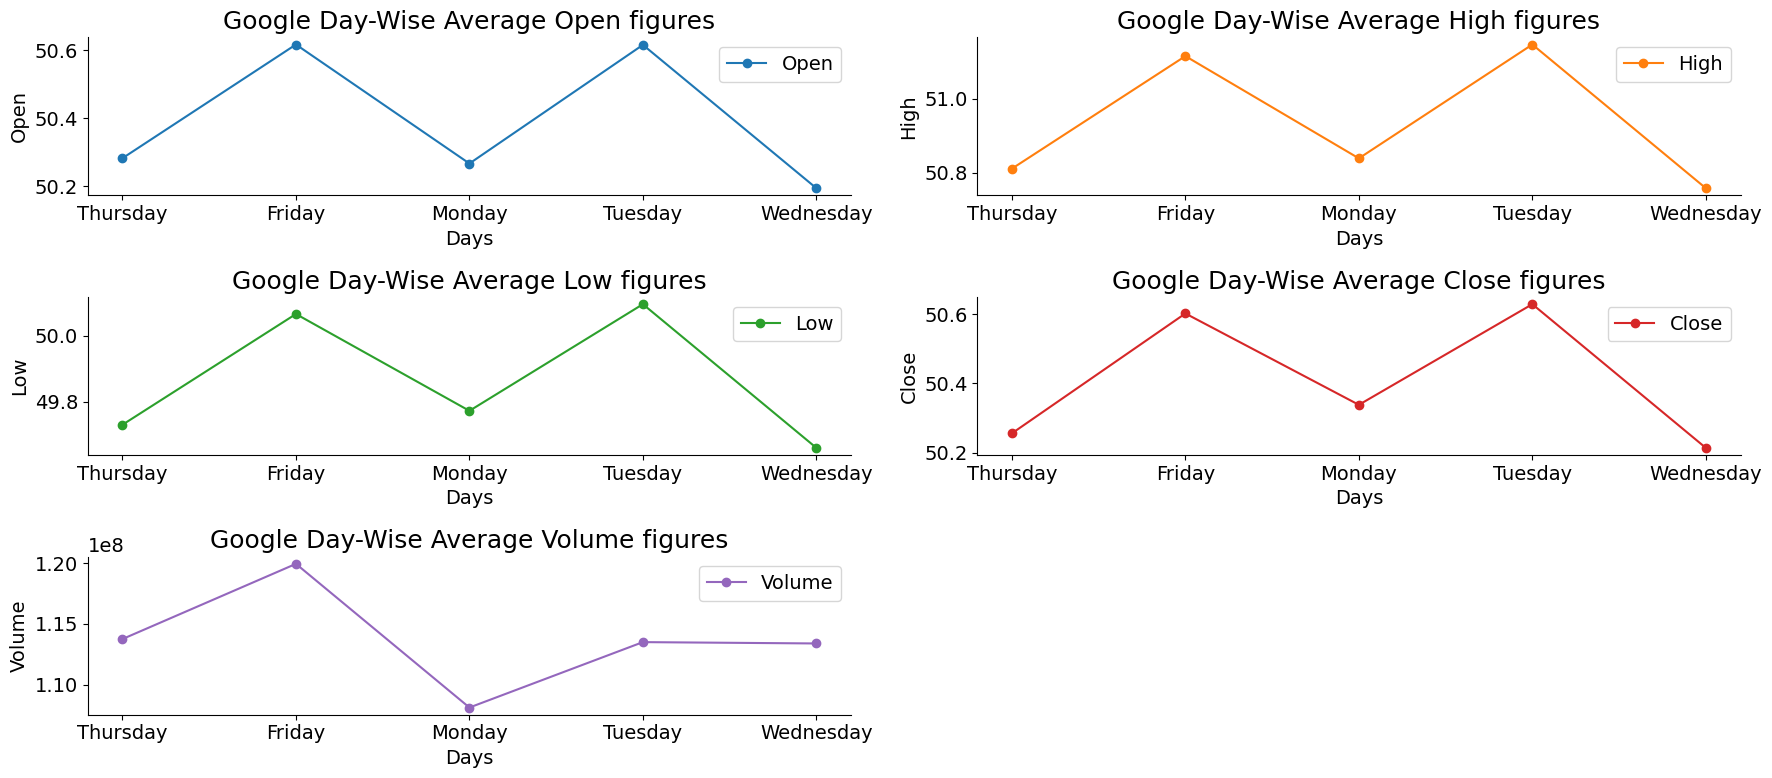

In [ ]:
a=3
b=2
c=1
colors = plt.rcParams["axes.prop_cycle"]()
fig = plt.figure(figsize=(18,8))

for i in range(len(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().columns[:-2])):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    plt.plot(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i], color= color, marker='o')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(rotation=0)
    plt.title(f"Google Day-Wise Average {data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name} figures", fontsize=18)
    plt.xlabel('Days')
    plt.ylabel(data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name)
    plt.legend([data_hist.groupby(data_hist.index.day_name(), sort=False).mean().iloc[:, i].name])
    c = c + 1

plt.tight_layout()
plt.show()

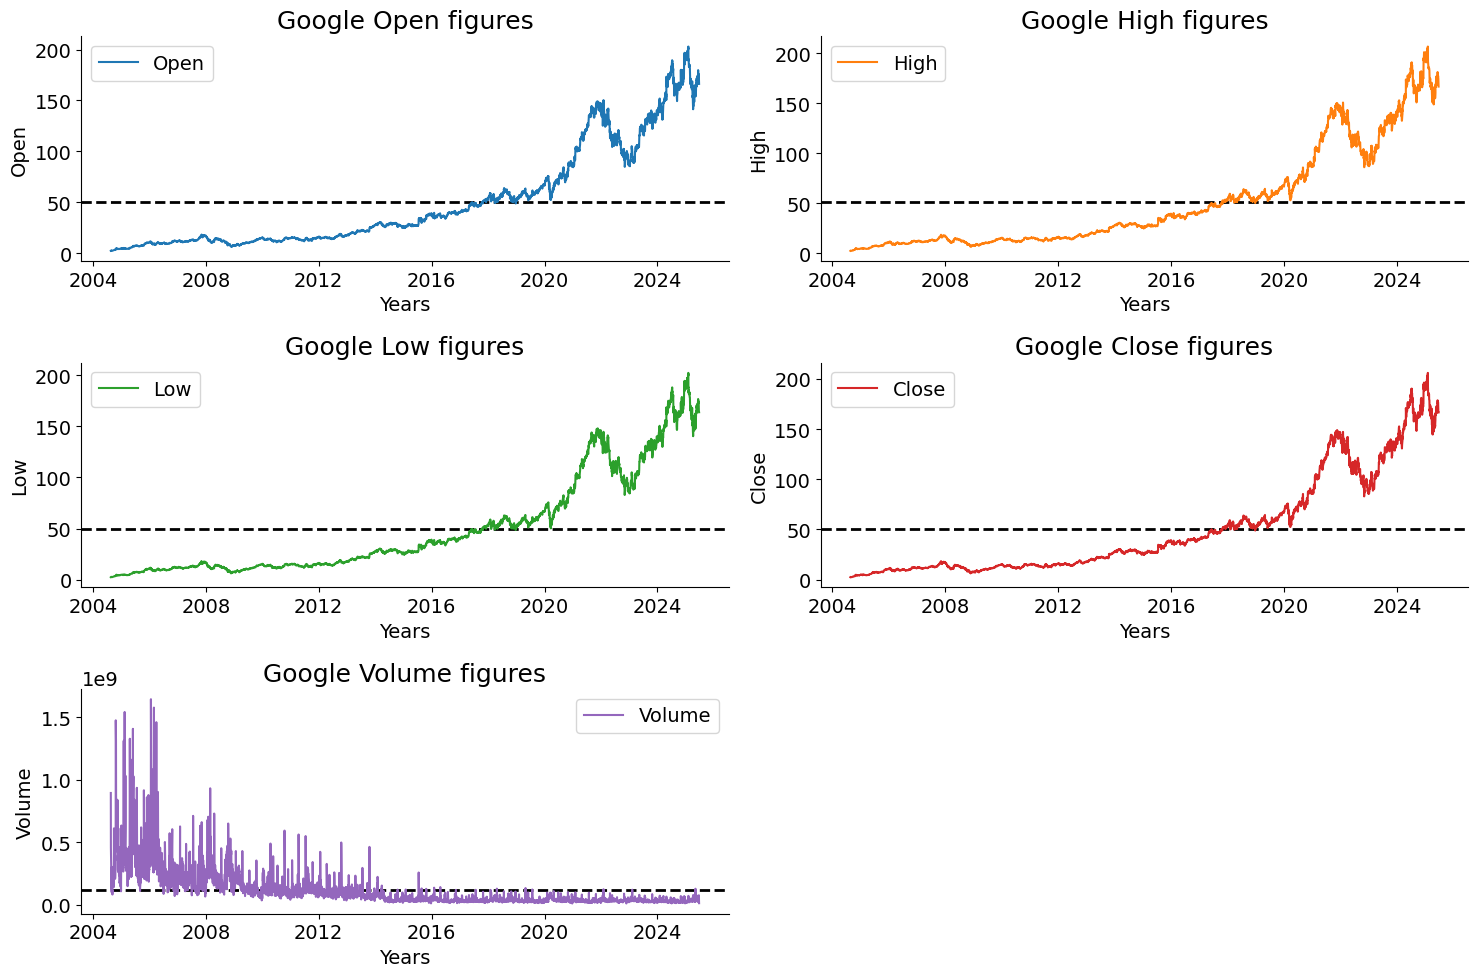

In [ ]:
a = 3
b = 2
c = 1

colors = plt.rcParams["axes.prop_cycle"]()

fig = plt.figure(figsize=(15,10))

for i in range(len(data_hist.columns[:-2])):
    color = next(colors)["color"]
    plt.subplot(a, b, c)

    plt.plot(data_hist[data_hist.columns[i]], color = color)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.axhline(data_hist[data_hist.columns[i]].mean(), linestyle='--', lw=2, zorder=1, color='black')

    plt.title("Google "+data_hist.columns[i] + " figures", fontsize=18)
    plt.xlabel('Years')

    plt.ylabel(data_hist.columns[i])

    plt.legend([data_hist.columns[i]])

    c = c + 1


plt.tight_layout()


plt.show()

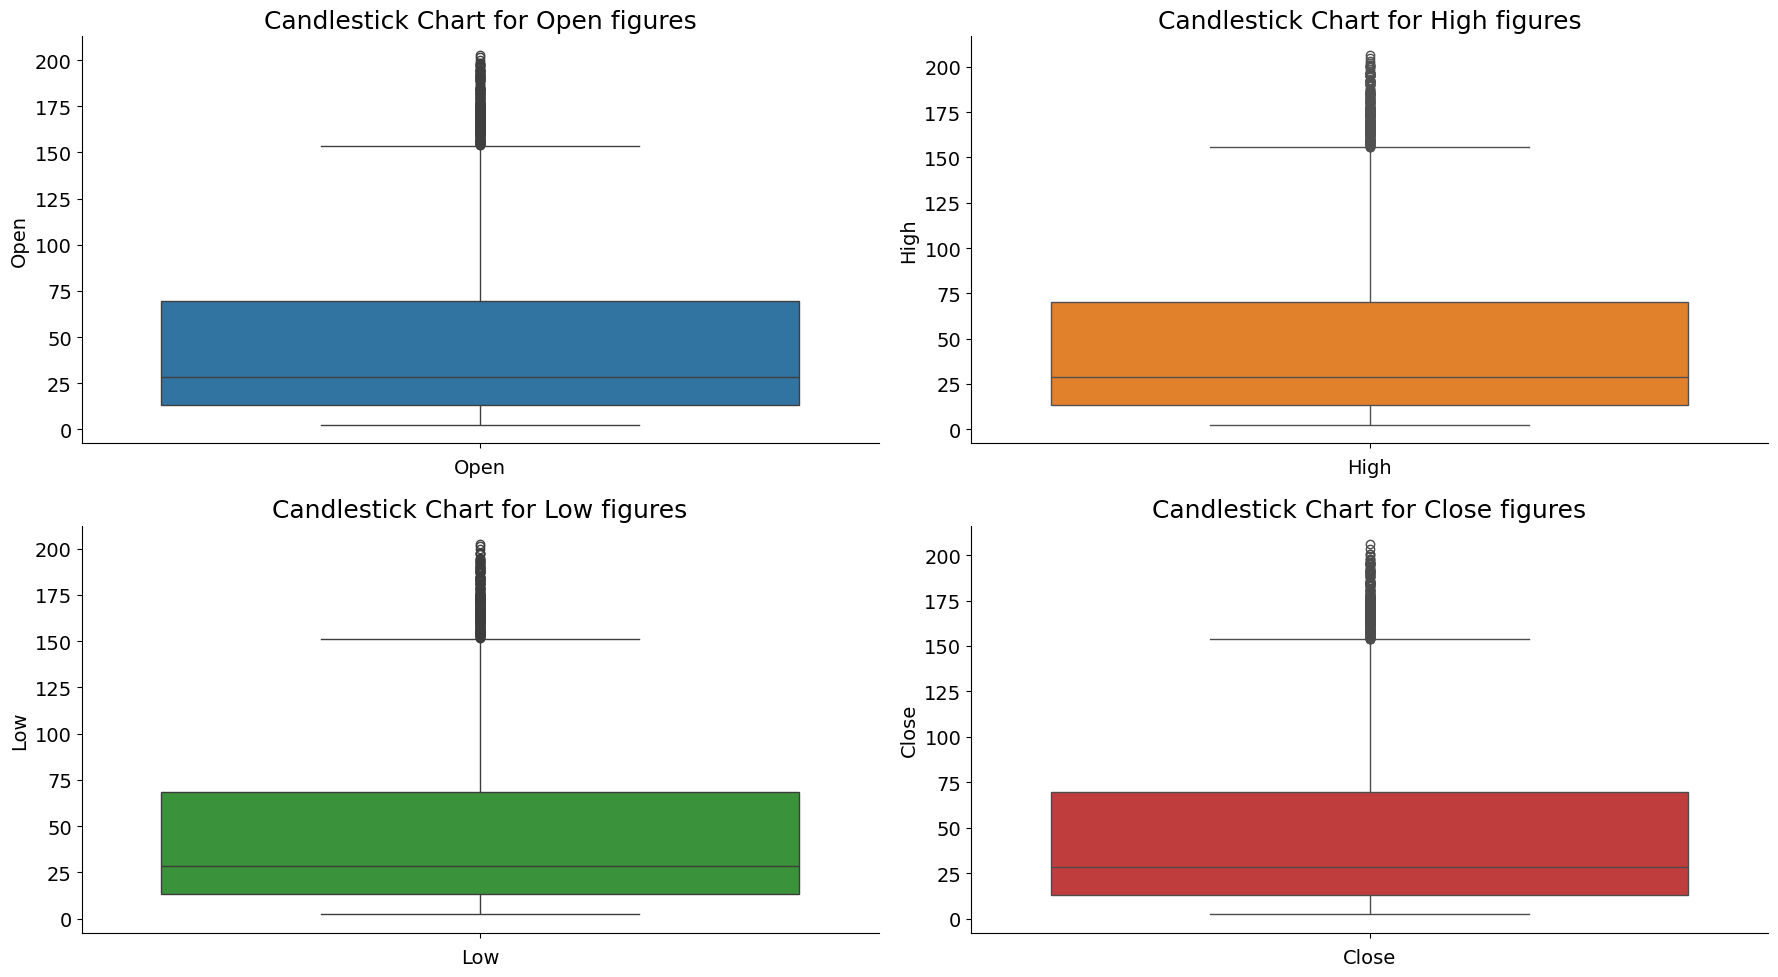

In [ ]:
colors = plt.rcParams["axes.prop_cycle"]()

a = 2
b = 2
c = 1


fig = plt.figure(figsize=(18,10))


for i in range(len(data_hist.columns[:-3])):
    color = next(colors)["color"]
    plt.subplot(a, b, c)

    sns.boxplot(data_hist[data_hist.columns[i]], color= color )

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel(data_hist.columns[i])

    plt.title(f'Candlestick Chart for {data_hist.columns[i]} figures', fontsize=18)
    c = c + 1

plt.tight_layout()

plt.show()


In [ ]:
def candlestick(t, o, h, l, c):



    plt.figure(figsize=(22,5))

    color = ["green" if close_price > open_price else "red" for close_price, open_price in zip(c, o)]

    plt.bar(x=t, height=np.abs(o-c), bottom=np.min((o,c), axis=0), color=color, linewidth=0)

    plt.bar(x=t, height=h-l, bottom=l, color=color, linewidth=0)

    plt.grid(visible=False)

    plt.title('Candlestick Chart')

In [ ]:
today = date.today()
start = '2020-12-31'
end = today

In [ ]:
!pip install mplfinance


In [ ]:
data_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"].dropna()

,Close
Date,
2004-08-20 00:00:00-04:00,1.0
2004-08-23 00:00:00-04:00,1.0
2004-08-24 00:00:00-04:00,0.0
2004-08-25 00:00:00-04:00,1.0
2004-08-26 00:00:00-04:00,1.0
...,...
2025-06-16 00:00:00-04:00,1.0
2025-06-17 00:00:00-04:00,0.0
2025-06-18 00:00:00-04:00,0.0


In [ ]:
# Step 1: Create the 'Target' column using rolling comparison on 'Close'
data_hist["Target"] = data_hist["Close"].rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])

# Step 2: Shift all data by 1 row
df = data_hist.shift(1)

# Step 3: Remove any rows that contain NaN values
df = df.dropna()

# Step 4: (Optional) Preview
df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
Date,,,,,,,,
2004-08-23 00:00:00-04:00,2.512708,2.713456,2.500021,2.694301,456686856.0,0.0,0.0,1.0
2004-08-24 00:00:00-04:00,2.754999,2.822910,2.712710,2.721416,365122512.0,0.0,0.0,1.0
2004-08-25 00:00:00-04:00,2.767188,2.776144,2.576391,2.608729,304946748.0,0.0,0.0,0.0
2004-08-26 00:00:00-04:00,2.610968,2.686591,2.584102,2.636839,183772044.0,0.0,0.0,1.0
2004-08-27 00:00:00-04:00,2.610719,2.685346,2.603505,2.684351,141897960.0,0.0,0.0,1.0


In [ ]:
#Create a list of predictors
predictors = ["Close", "Volume", "Open", "High", "Low"]

#Select the columns in the data for the predictors and the target
df = df[["Open", "High", "Low", "Close", "Volume",'Target']].iloc[2:]

#Print the first five rows of the data
df.head()

,Open,High,Low,Close,Volume,Target
Date,,,,,,
2004-08-25 00:00:00-04:00,2.767188,2.776144,2.576391,2.608729,304946748.0,0.0
2004-08-26 00:00:00-04:00,2.610968,2.686591,2.584102,2.636839,183772044.0,1.0
2004-08-27 00:00:00-04:00,2.610719,2.685346,2.603505,2.684351,141897960.0,1.0
2004-08-30 00:00:00-04:00,2.689078,2.702013,2.629127,2.640569,124235640.0,0.0
2004-08-31 00:00:00-04:00,2.618928,2.624152,2.537584,2.537584,103935960.0,0.0


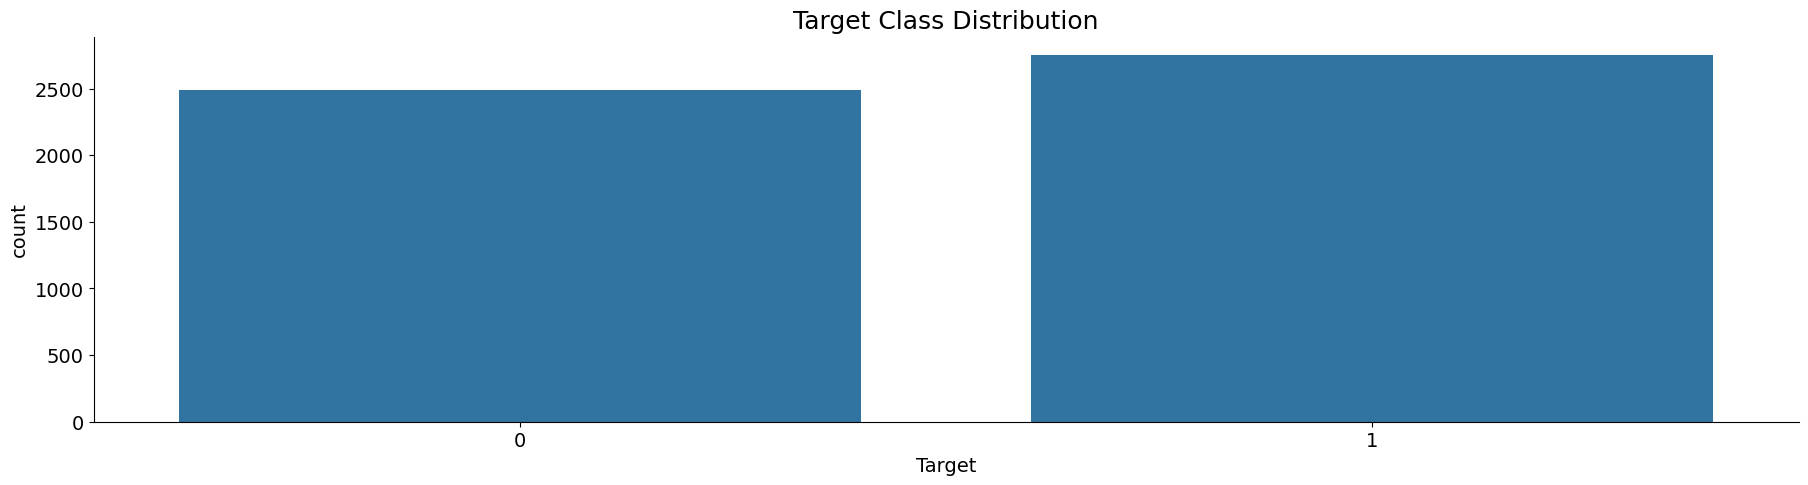

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Target column has integer class labels
df['Target'] = df['Target'].astype(int)

# Create countplot of class distribution
sns.countplot(x='Target', data=df)

# Clean up plot aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target')
plt.title('Target Class Distribution', fontsize=18)

# Show the plot
plt.show()


In [ ]:
# Initiate a RandomOverSampler object and assigns it to the variable 'ros'.
ros = RandomOverSampler(random_state=0)

# Assigns the feature data to the variable 'X'.
X = df[["Open", "High", "Low", "Close", "Volume"]]

# Assigns the target data to the variable 'y'.
y = df['Target'].values

# Apply RandomOverSampler to the feature and target data then assigns the data to the variables 'X_resampled' & 'y_resampled'.
X_resampled, y_resampled  = ros.fit_resample(X,y)

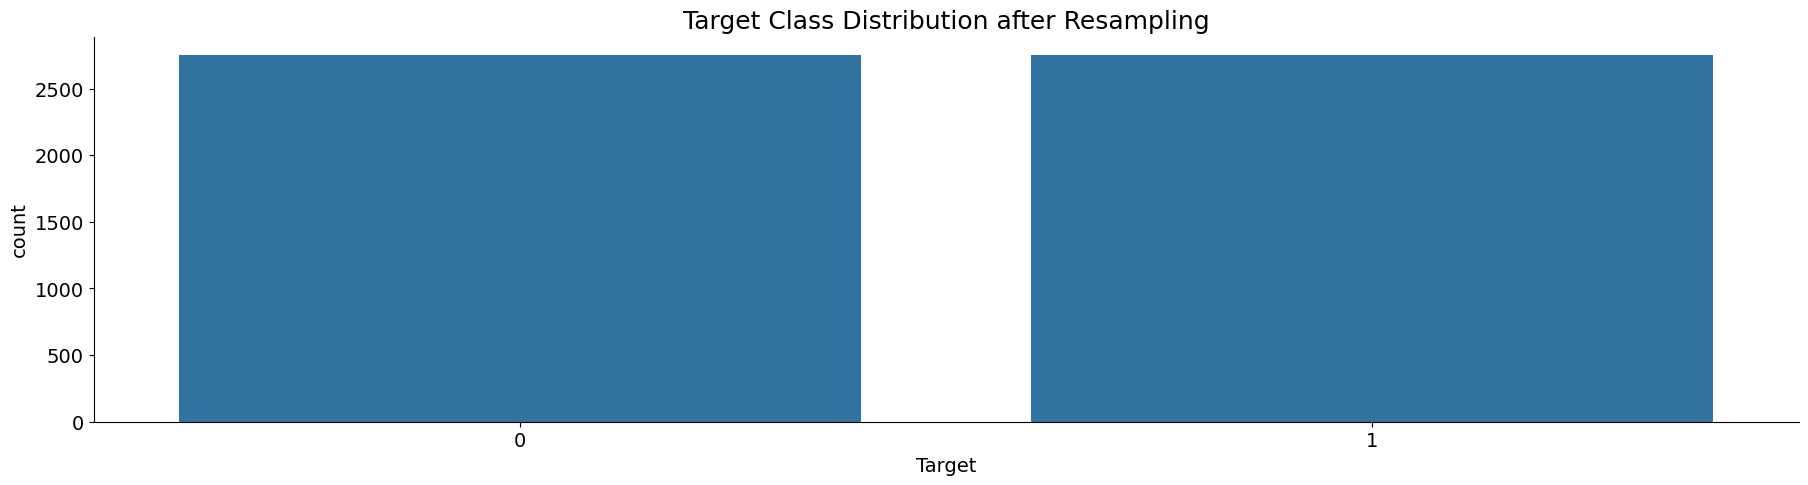

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Step 1: Initialize RandomOverSampler
ros = RandomOverSampler(random_state=0)

# Step 2: Define features and target
X = df[["Open", "High", "Low", "Close", "Volume"]]
y = df['Target'].values

# Step 3: Apply RandomOverSampler
X_resampled, y_resampled = ros.fit_resample(X, y)

# Step 4: Convert to Series and ensure integer labels
y_resampled = pd.Series(y_resampled).astype(int)

# Step 5: Plot the resampled class distribution
sns.countplot(x=y_resampled)

# Beautify the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target')
plt.title('Target Class Distribution after Resampling', fontsize=18)
plt.show()


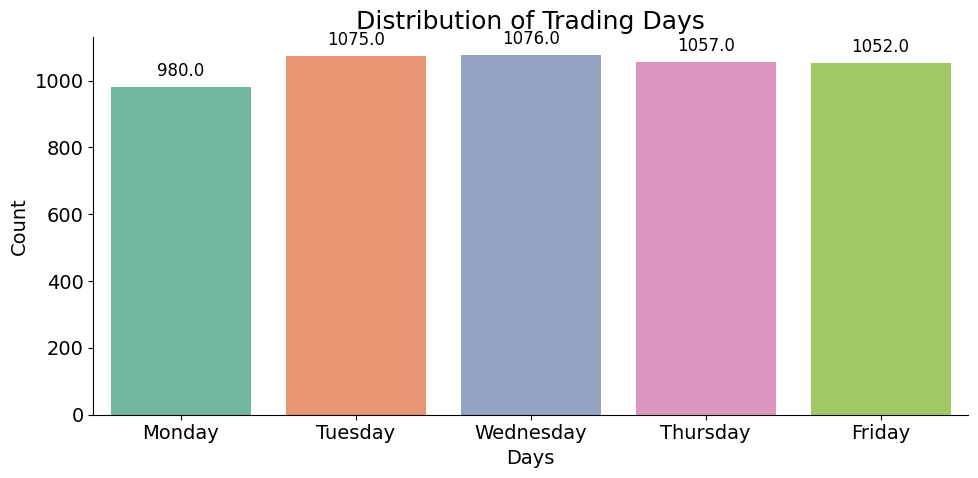

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a vertical countplot of trading days
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df.index.day_name(),
                   order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"],
                   palette="Set2")

# Remove top and right spines
sns.despine()

# Label x-axis and title
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Distribution of Trading Days', fontsize=18)

# Add value labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
threshold = int(len(X_resampled)*0.75)

In [ ]:
X_train, y_train = X_resampled.iloc[:threshold, :], y_resampled[:threshold]
X_test, y_test = X_resampled.iloc[threshold:, :], y_resampled[threshold:]

In [ ]:
X_train.head()

,Open,High,Low,Close,Volume
0,2.767188,2.776144,2.576391,2.608729,304946748.0
1,2.610968,2.686591,2.584102,2.636839,183772044.0
2,2.610719,2.685346,2.603505,2.684351,141897960.0
3,2.689078,2.702013,2.629127,2.640569,124235640.0
4,2.618928,2.624152,2.537584,2.537584,103935960.0


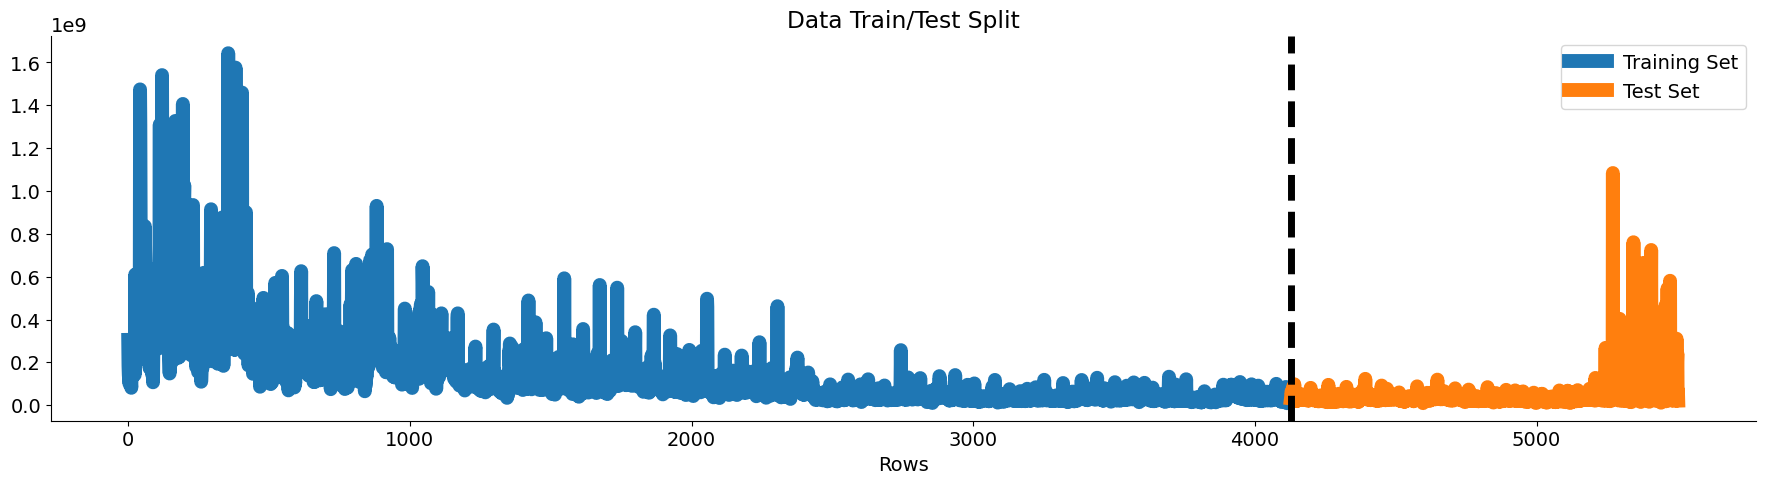

In [ ]:
fig, ax = plt.subplots()

# Plot the Volume column from the training set on the axis
X_train['Volume'].plot(ax=ax, label='Training Set', title='Data Train/Test Split', linewidth=10)

# Plot the Volume column from the test set on the axis
X_test['Volume'].plot(ax=ax, label='Test Set',  linewidth=10)

# Remove the top and right spines from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

# Add a vertical line to the plot at the threshold value
ax.axvline(threshold, color='black', ls='--', lw=5)

# Add a legend to the plot
ax.legend(['Training Set', 'Test Set'])

# Label the x-axis
ax.set_xlabel('Rows')
plt.show()

In [ ]:
print(f'X_train Shape {X_train.shape}, y_train Shape {y_train.shape}')
print(f'X_test shape {X_test.shape}, y_test shape {y_test.shape}')

X_train Shape (4128, 5), y_train Shape (4128,)
X_test shape (1376, 5), y_test shape (1376,)


In [ ]:
import xgboost as xgb

# Step 1: Convert datasets to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Step 2: Set parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': ['error', 'logloss']
}

# Step 3: Define evaluation sets
evals = [(dtrain, 'train'), (dtest, 'test')]

# Step 4: Train with early stopping
model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals,
                  early_stopping_rounds=10, verbose_eval=False)

# Step 5: Predict
predictions = model.predict(dtest)
predictions = [1 if p > 0.5 else 0 for p in predictions]


In [ ]:
y_test[:5]

,0
4128,0
4129,1
4130,1
4131,1
4132,1


In [ ]:
predictions[:5]

[1, 1, 1, 1, 1]

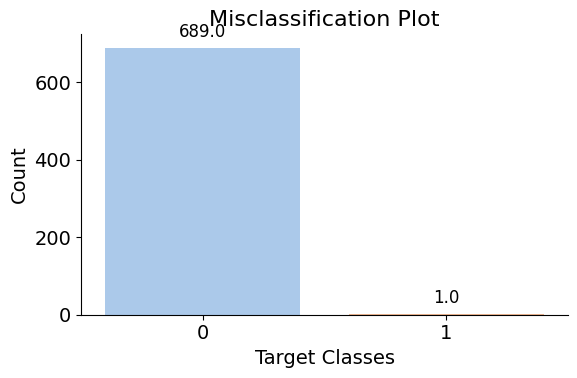

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert to int and to Series for clean countplot
misclassified = pd.Series(y_test[y_test != predictions]).astype(int)

# Create countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=misclassified, palette="pastel")

# Remove top and right spines
sns.despine()

# Labels and title
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Misclassification Plot', fontsize=16)

# Add data labels
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()



In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.12      0.21       783
           1       0.46      1.00      0.63       593

    accuracy                           0.50      1376
   macro avg       0.73      0.56      0.42      1376
weighted avg       0.76      0.50      0.39      1376



In [ ]:
params  # This is equivalent to history.get_xgb_params()


{'max_depth': 3,
 'eta': 0.1,
 'objective': 'binary:logistic',
 'eval_metric': ['error', 'logloss']}

In [ ]:
model.attributes()  # Gives attributes like 'best_iteration'


{'best_iteration': '20', 'best_score': '0.6982334756703917'}

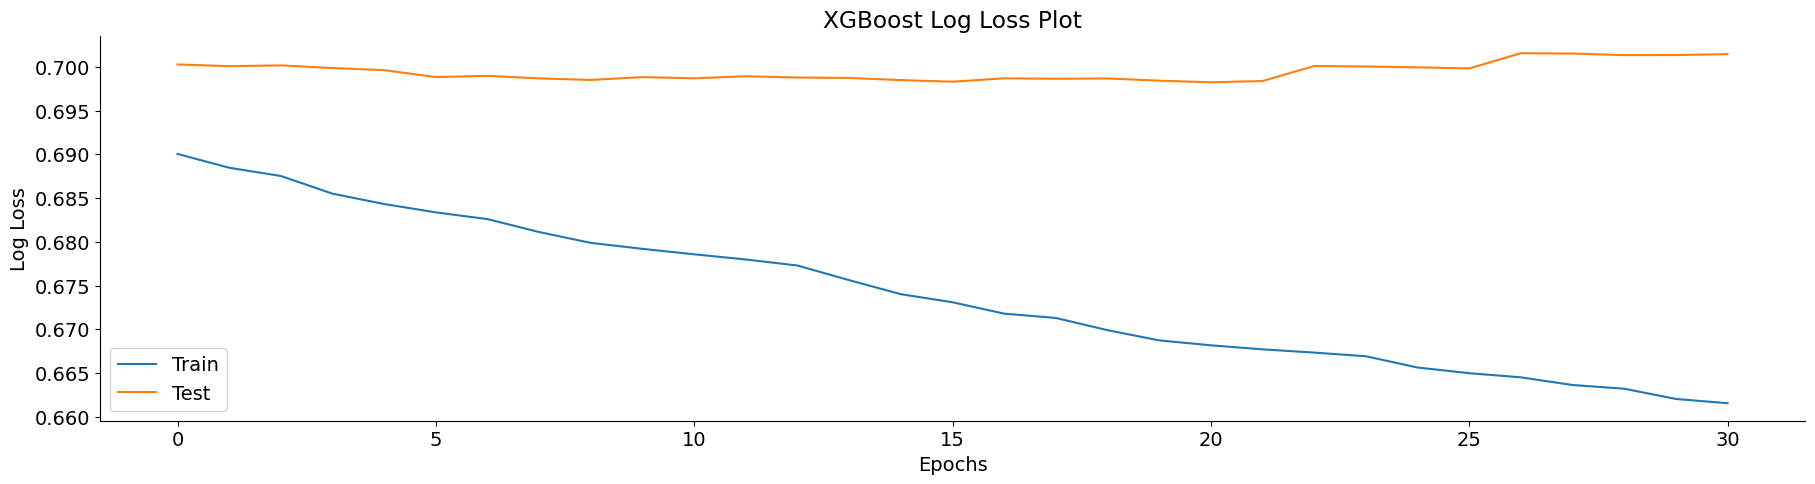

In [ ]:
import matplotlib.pyplot as plt

# Define a dictionary to store evaluation results
evals_result = {}

# Train the model with evals_result storage
model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals,
                  early_stopping_rounds=10, evals_result=evals_result, verbose_eval=False)

# Extract number of epochs from stored results
epochs = len(evals_result['train']['error'])
x_axis = range(epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, evals_result['train']['logloss'], label='Train')
ax.plot(x_axis, evals_result['test']['logloss'], label='Test')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss Plot')
plt.show()


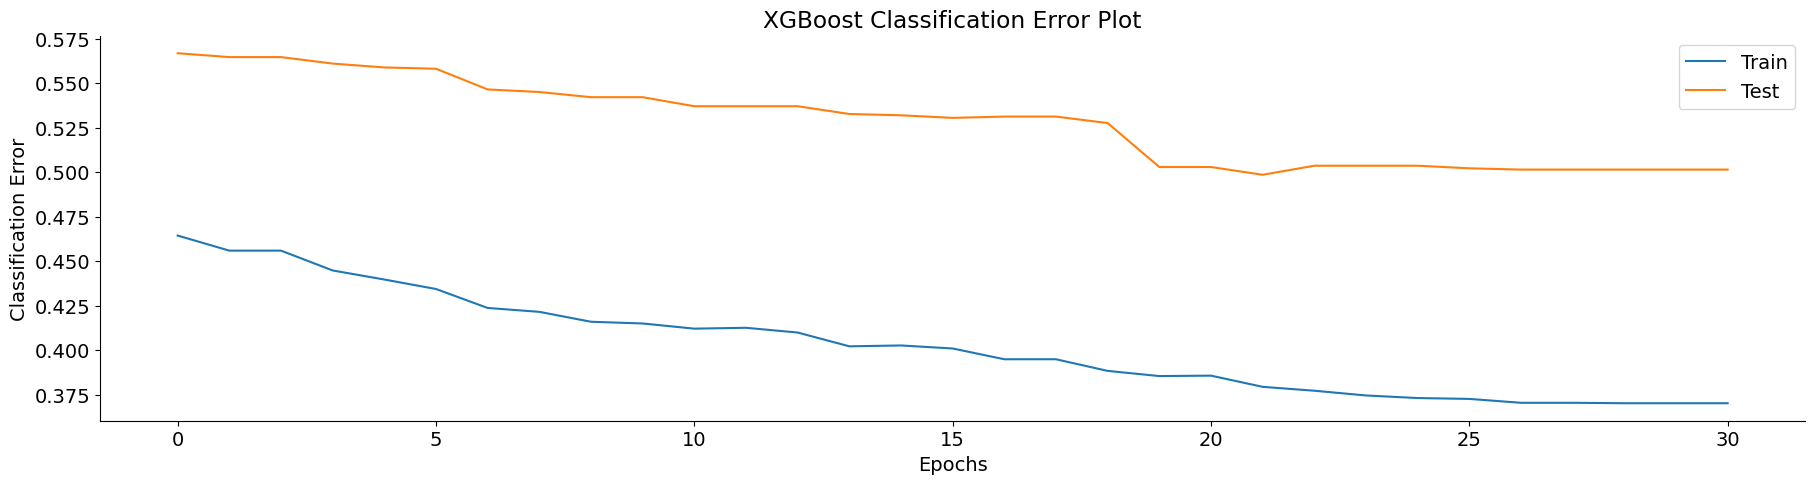

In [ ]:
# Number of epochs = number of boosting rounds run
epochs = len(evals_result['train']['error'])

# X-axis range
x_axis = range(epochs)

# Create the plot
fig, ax = plt.subplots()

# Plot training and testing error
ax.plot(x_axis, evals_result['train']['error'], label='Train')
ax.plot(x_axis, evals_result['test']['error'], label='Test')

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend and labels
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error Plot')
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Convert datasets to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters matching your XGBClassifier setup
params = {
    'max_depth': 7,
    'eta': 0.1,
    'lambda': 0.6,  # L2 regularization
    'objective': 'binary:logistic',
    'eval_metric': ['error', 'logloss']
}

# Set up evaluation results dictionary
evals_result = {}

# Train with early stopping
model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dtrain, 'train'), (dtest, 'test')],
                  early_stopping_rounds=2, evals_result=evals_result, verbose_eval=False)

# Make predictions
predictions_prob = model.predict(dtest)
predictions = [1 if p > 0.5 else 0 for p in predictions_prob]

# Classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.08      0.15       783
           1       0.45      1.00      0.62       593

    accuracy                           0.48      1376
   macro avg       0.73      0.54      0.39      1376
weighted avg       0.76      0.48      0.35      1376



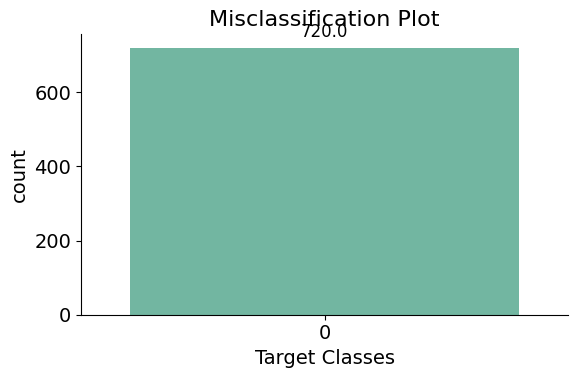

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert misclassified predictions to int Series for clean countplot
misclassified = pd.Series(y_test[y_test != predictions]).astype(int)

# Create countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=misclassified, palette='Set2')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Label x-axis and add title
plt.xlabel('Target Classes')
plt.title('Misclassification Plot', fontsize=16)

# Add data labels
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set model parameters
params = {
    'max_depth': 15,
    'eta': 0.1,
    'lambda': 0.6,
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

# Dictionary to store evaluation results
evals_result = {}

# Train the model with early stopping
model = xgb.train(params, dtrain, num_boost_round=1000,
                  evals=[(dtrain, 'train'), (dtest, 'test')],
                  early_stopping_rounds=2,
                  evals_result=evals_result,
                  verbose_eval=False)

# Make predictions and threshold at 0.5
predictions_prob = model.predict(dtest)
predictions = [1 if p > 0.5 else 0 for p in predictions_prob]

# Print classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.98      0.16      0.27       783
           1       0.47      1.00      0.64       593

    accuracy                           0.52      1376
   macro avg       0.73      0.58      0.46      1376
weighted avg       0.76      0.52      0.43      1376



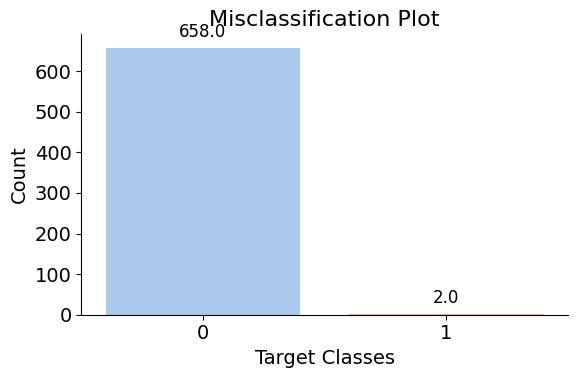

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert misclassified values to integer Series
misclassified = pd.Series(y_test[y_test != predictions]).astype(int)

# Create countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=misclassified, palette="pastel")

# Clean plot appearance
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Misclassification Plot', fontsize=16)

# Add count labels
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
param_grid = { 'max_depth' : [18, 21, 25],
             'reg_lambda': [0.1, 0.4, 0.8]
             }

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the model (base estimator)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1],
    'reg_lambda': [0.1, 0.6]
}

# Apply Grid Search
clf = GridSearchCV(model, param_grid=param_grid, cv=3)
clf.fit(X_resampled, y_resampled)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...ax_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 10, 15],
                         'reg_lambda': [0.1, 0.6]})

In [ ]:
print(f'The best parameters are {clf.best_params_}')

The best parameters are {'learning_rate': 0.1, 'max_depth': 15, 'reg_lambda': 0.1}


In [ ]:
print(f'The best model is {clf.best_estimator_}')

The best model is XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'max_depth': 25,
    'eta': 0.1,
    'lambda': 0.8,
    'objective': 'binary:logistic',
    'eval_metric': ['error', 'logloss']
}

# Dictionary to store evaluation results
evals_result = {}

# Train the model with early stopping
model = xgb.train(params, dtrain, num_boost_round=1000,
                  evals=[(dtrain, 'train'), (dtest, 'test')],
                  early_stopping_rounds=10,
                  evals_result=evals_result,
                  verbose_eval=False)

# Predict and round
predictions_prob = model.predict(dtest)
predictions = [1 if p > 0.5 else 0 for p in predictions_prob]

# Print model configuration and classification report
print(f'After hyperparameter tuning:')
print(f'  Learning rate (eta): {params["eta"]}')
print(f'  Max depth: {params["max_depth"]}')
print(f'  L2 regularization (lambda): {params["lambda"]}')
print()
print(classification_report(y_test, predictions))


After hyperparameter tuning:
  Learning rate (eta): 0.1
  Max depth: 25
  L2 regularization (lambda): 0.8

              precision    recall  f1-score   support

           0       0.64      0.47      0.54       783
           1       0.48      0.66      0.56       593

    accuracy                           0.55      1376
   macro avg       0.56      0.56      0.55      1376
weighted avg       0.57      0.55      0.55      1376



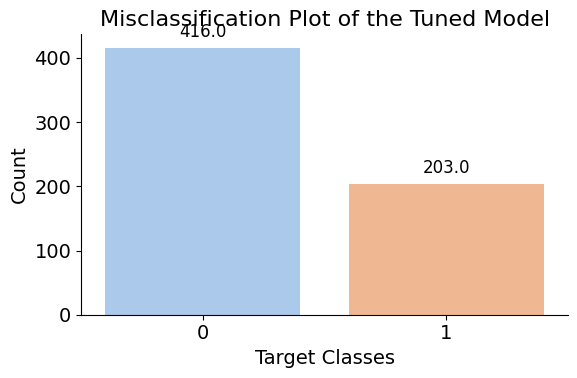

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert misclassified labels to int Series for clean categorical plotting
misclassified = pd.Series(y_test[y_test != predictions]).astype(int)

# Create figure
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=misclassified, palette='pastel')

# Beautify plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Misclassification Plot of the Tuned Model', fontsize=16)

# Add data labels
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', size=12,
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()



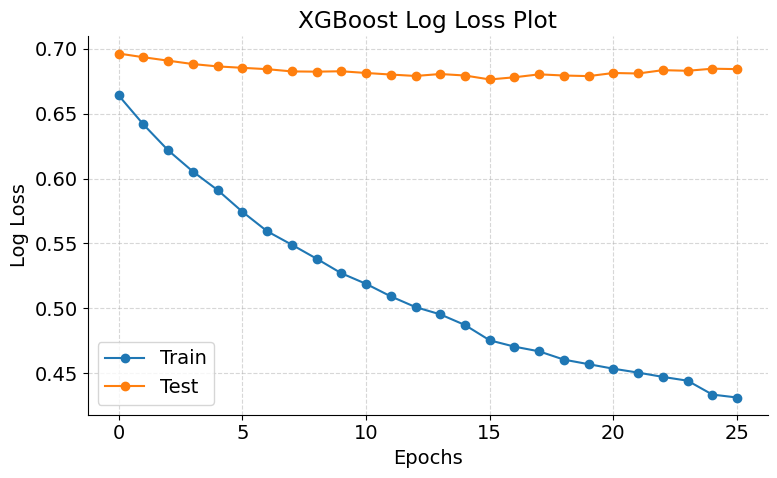

In [ ]:
import matplotlib.pyplot as plt

# Get the number of epochs (iterations)
epochs = len(evals_result['train']['logloss'])

# Create range of epochs for the x-axis
x_axis = range(0, epochs)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 5))

# Plot training and testing log loss
ax.plot(x_axis, evals_result['train']['logloss'], label='Train', marker='o')
ax.plot(x_axis, evals_result['test']['logloss'], label='Test', marker='o')

# Style the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss Plot')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


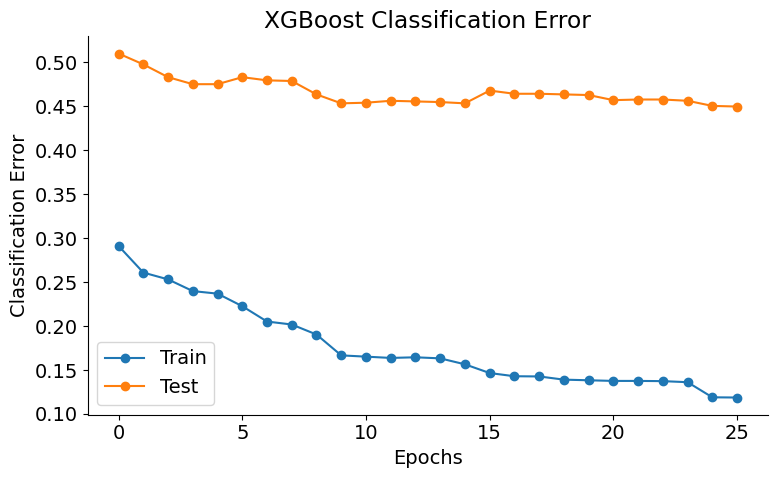

In [ ]:
import matplotlib.pyplot as plt

# Get the number of epochs used in training
epochs = len(evals_result['train']['error'])

# Set the x-axis range from 0 to number of epochs
x_axis = range(0, epochs)

# Create the figure and axis for plotting
fig, ax = plt.subplots(figsize=(8, 5))

# Plot training error against the x-axis
ax.plot(x_axis, evals_result['train']['error'], label='Train', marker='o')

# Plot test error against the x-axis
ax.plot(x_axis, evals_result['test']['error'], label='Test', marker='o')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
ax.legend()

# Label the axes and title
plt.xlabel('Epochs')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import xgboost as xgb
import pandas as pd

def backtest(data, params, predictors, start=1000, step=50, num_boost_round=100):
    predictions = []

    for i in range(start, data.shape[0], step):
        # Split data
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()

        # Create DMatrix objects
        dtrain = xgb.DMatrix(train[predictors], label=train["Target"])
        dtest = xgb.DMatrix(test[predictors])

        # Train model
        model = xgb.train(params, dtrain, num_boost_round=num_boost_round, verbose_eval=False)

        # Predict
        preds = model.predict(dtest)
        preds = pd.Series(preds, index=test.index)
        preds = preds.apply(lambda x: 1 if x > 0.6 else 0)

        # Combine predictions with actual targets
        combined = pd.concat({"Target": test["Target"], "Predictions": preds}, axis=1)
        predictions.append(combined)

    return pd.concat(predictions)


In [ ]:
params = {
    'max_depth': 7,
    'eta': 0.1,
    'lambda': 0.6,
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

start = time.time()
backtestpredictions = backtest(df, params, predictors)
end = time.time()

print(f'Time Elapsed in Backtesting: {round(end - start, 2)} seconds')




Time Elapsed in Backtesting: 20.87 seconds


In [ ]:
backtestpredictions

,Target,Predictions
Date,,
2008-08-14 00:00:00-04:00,0,0
2008-08-15 00:00:00-04:00,1,1
2008-08-18 00:00:00-04:00,1,1
2008-08-19 00:00:00-04:00,0,0
2008-08-20 00:00:00-04:00,0,1
...,...,...
2025-06-16 00:00:00-04:00,0,1
2025-06-17 00:00:00-04:00,1,1
2025-06-18 00:00:00-04:00,0,1


In [ ]:
print('Precision Score before adding predictors',
      round(precision_score(backtestpredictions['Target'], backtestpredictions['Predictions'])*100,2))

Precision Score before adding predictors 66.0


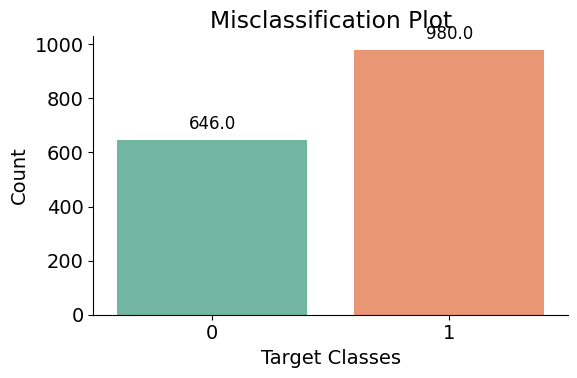

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert misclassified targets to integer Series
misclassified = backtestpredictions.loc[
    backtestpredictions['Target'] != backtestpredictions['Predictions'], 'Target'
].astype(int)

# Plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=misclassified, palette="Set2")

# Beautify the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Misclassification Plot')

# Add count labels on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
weekly_mean = df.rolling(7).mean()
quarterly_mean = df.rolling(90).mean()
annual_mean = df.rolling(365).mean()

# Calculate the weekly trend
weekly_trend = df.shift(1).rolling(7).mean()["Target"]

# Compute the rolling mean ratios and other ratios
df["weekly_mean"] = weekly_mean["Close"] / df["Close"]
df["quarterly_mean"] = quarterly_mean["Close"] / df["Close"]
df["annual_mean"] = annual_mean["Close"] / df["Close"]

#Adding Annual and weekly trends
df["annual_weekly_mean"] = df["annual_mean"] / df["weekly_mean"]
df["annual_quarterly_mean"] = df["annual_mean"] / df["quarterly_mean"]
df["weekly_trend"] = weekly_trend

#Calculate ratio of open and close
df["open_close_ratio"] = df["Open"] / df["Close"]
df["high_close_ratio"] = df["High"] / df["Close"]

#Calculate ratio of low and close
df["low_close_ratio"] = df["Low"] / df["Close"]

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Target,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,weekly_trend,open_close_ratio,high_close_ratio,low_close_ratio
Date,,,,,,,,,,,,,,,
2004-08-25 00:00:00-04:00,2.767188,2.776144,2.576391,2.608729,304946748.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.060742,1.064175,0.987604
2004-08-26 00:00:00-04:00,2.610968,2.686591,2.584102,2.636839,183772044.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0.990189,1.018868,0.980000
2004-08-27 00:00:00-04:00,2.610719,2.685346,2.603505,2.684351,141897960.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0.972570,1.000371,0.969882
2004-08-30 00:00:00-04:00,2.689078,2.702013,2.629127,2.640569,124235640.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.018370,1.023269,0.995667
2004-08-31 00:00:00-04:00,2.618928,2.624152,2.537584,2.537584,103935960.0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.032056,1.034114,1.000000


In [ ]:
print(f'We now have {df.shape[1]} columns after adding more predictors')

We now have 15 columns after adding more predictors


In [ ]:
#iterating over the range of the length of the df DataFrame
for i in range(len(df.columns)):
    #checking if the null value of the particular column is greater than zero
    if df[df.columns[i]].isnull().sum()>0:
        #printing the column number and name that has null values
        print(f'Column {i} {df.columns[i]} null values : {round(df[df.columns[i]].isnull().sum()/df.shape[0]*100,2)}%')

Column 6 weekly_mean null values : 0.11%
Column 7 quarterly_mean null values : 1.7%
Column 8 annual_mean null values : 6.95%
Column 9 annual_weekly_mean null values : 6.95%
Column 10 annual_quarterly_mean null values : 6.95%
Column 11 weekly_trend null values : 0.13%


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Target,0
weekly_mean,0
quarterly_mean,0
annual_mean,0
annual_weekly_mean,0


In [ ]:
predictors  = ['Open', 'High','Low','Close','Volume','weekly_mean','quarterly_mean','annual_mean',
 'annual_weekly_mean','annual_quarterly_mean','weekly_trend','open_close_ratio','high_close_ratio','low_close_ratio']

In [ ]:
import time

# Define XGBoost parameters
params = {
    'max_depth': 7,
    'eta': 0.1,
    'lambda': 0.6,
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}

# Time the backtesting process
start = time.time()
backtestpredictions = backtest(df, params, predictors)
end = time.time()

# Print elapsed time
print(f'Time Elapsed in Backtesting: {round(end - start, 2)} seconds')


Time Elapsed in Backtesting: 66.61 seconds


In [ ]:
print('Precision Score after adding predictors',
       round(precision_score(backtestpredictions['Target'], backtestpredictions['Predictions'])*100,2))

Precision Score after adding predictors 85.43


In [ ]:
print(classification_report(backtestpredictions['Target'], backtestpredictions['Predictions']))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      2006
           1       0.85      0.80      0.82      2234

    accuracy                           0.82      4240
   macro avg       0.82      0.82      0.82      4240
weighted avg       0.82      0.82      0.82      4240



In [ ]:
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error

In [ ]:
for i in df.columns[:4]:
    #Checking the stationarity of the data
    result = ts.adfuller(df[i])

    #Printing the test results
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    #Interpreting the test results
    if result[1] <= 0.05:
        print(i,'is stationary')
    else:
        print(i,'is not stationary')
    print('   ')

ADF Statistic: 0.799024
p-value: 0.991620
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Open is not stationary
   
ADF Statistic: 0.699554
p-value: 0.989829
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
High is not stationary
   
ADF Statistic: 0.495940
p-value: 0.984749
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Low is not stationary
   
ADF Statistic: 0.557603
p-value: 0.986523
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Close is not stationary
   


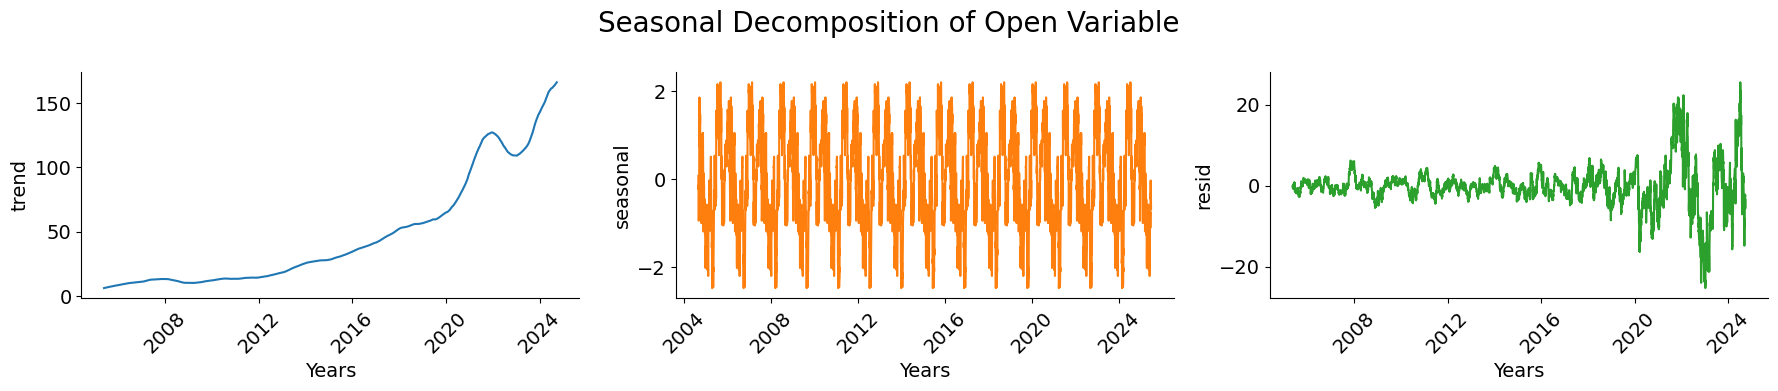

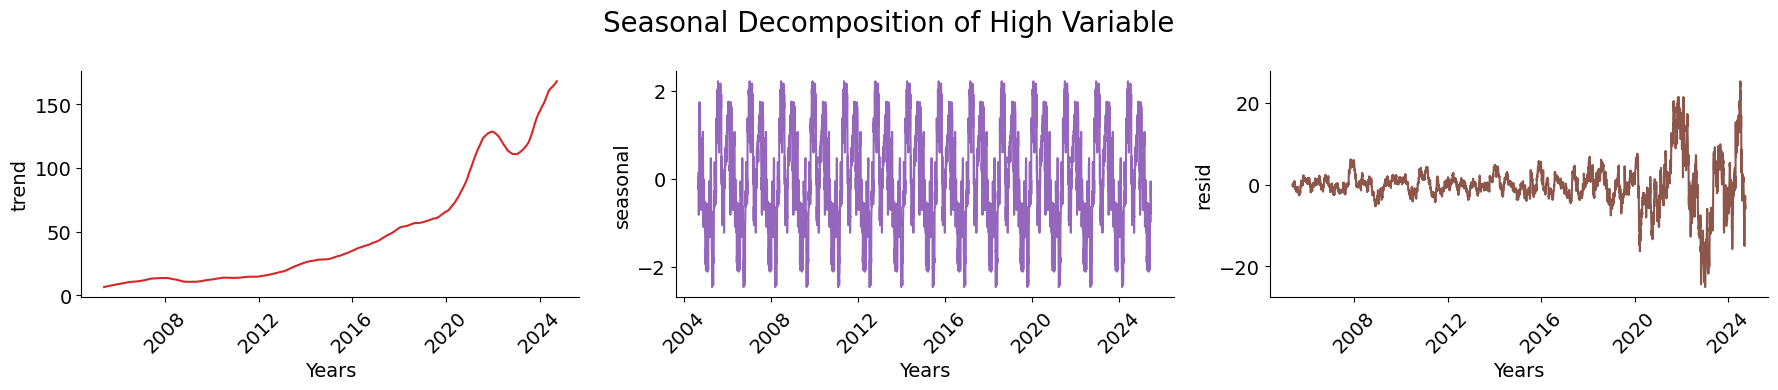

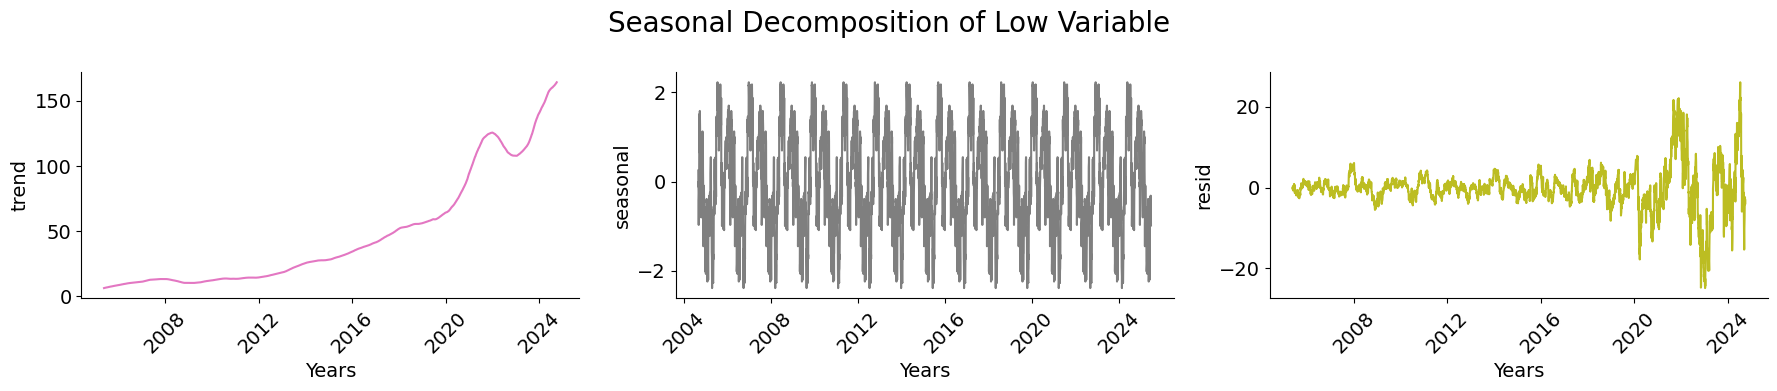

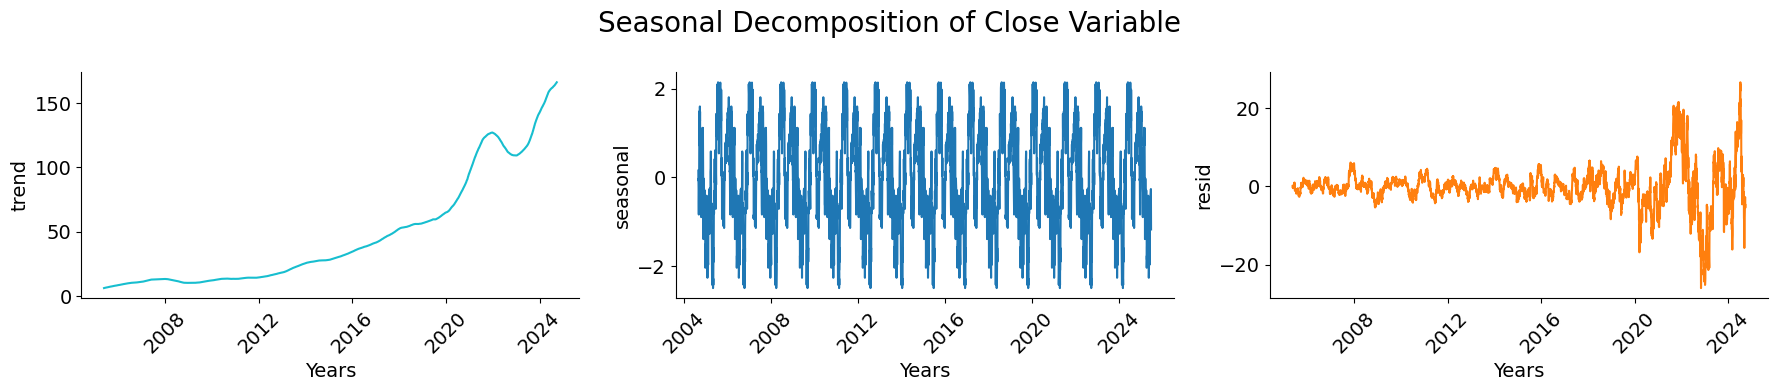

In [ ]:
colors = plt.rcParams["axes.prop_cycle"]()
for j in df.columns[:4]:
    results = seasonal_decompose(df[j], period=365)
    trend = results.trend
    seasonal = results.seasonal
    residual = results.resid
    properties = [trend, seasonal, residual]
    a = 1  # number of rows
    b = 3  # number of columns
    c = 1  # initialize plot counter
    fig = plt.figure(figsize=(18,4))
    fig.suptitle(f'Seasonal Decomposition of {j} Variable', fontsize=20)
    for i in properties:
        color = next(colors)["color"]
        plt.subplot(a, b, c)
        plt.plot(i , color=color)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.xlabel('Years')
        plt.ylabel(i.name)
        plt.xticks(rotation=45)
        c = c+1
    plt.tight_layout()
    plt.show()

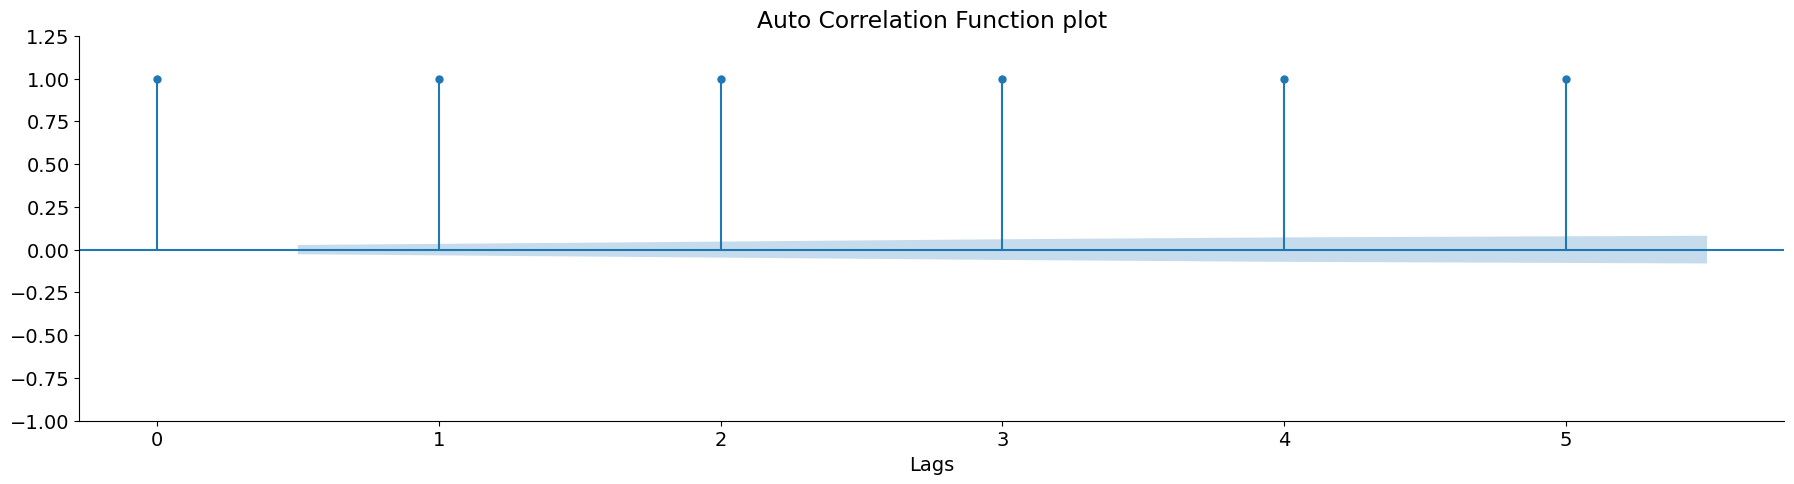

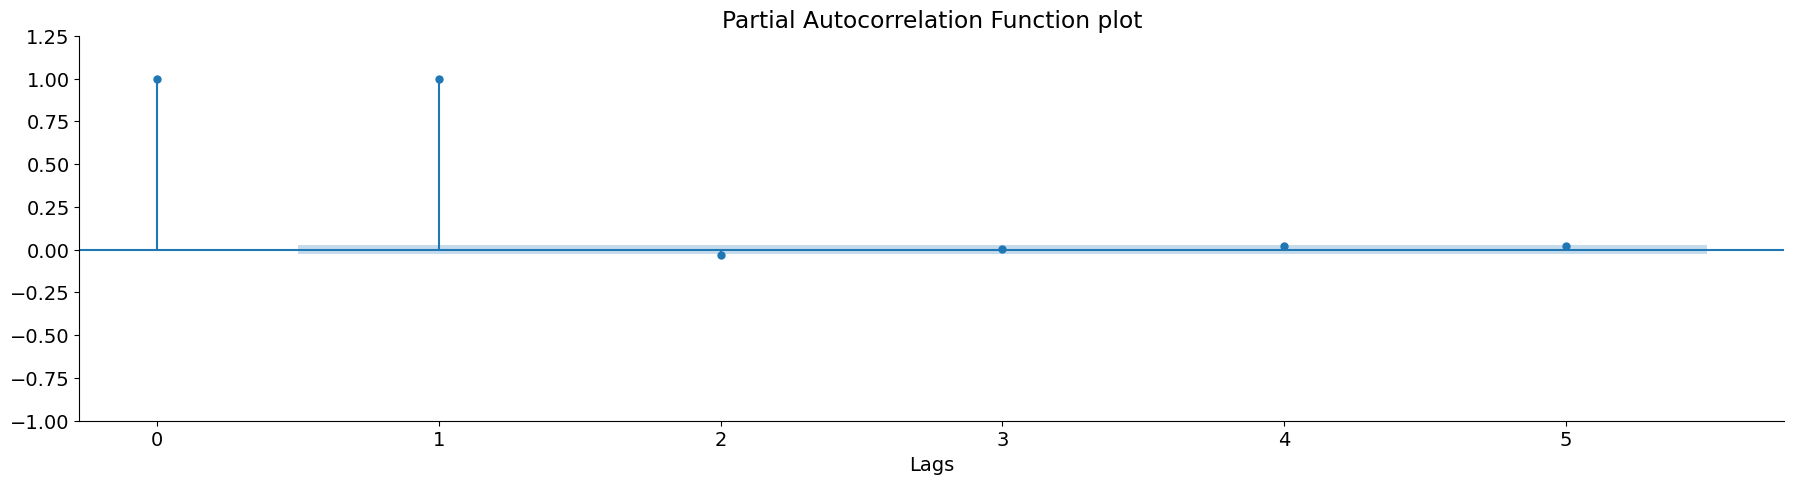

In [ ]:
plot_acf(df.High, lags=5, title='Auto Correlation Function plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Lags')
plt.ylim(top=1.25)
plt.show()

# plot the PACF plot
plot_pacf(df.High, lags=5, title='Partial Autocorrelation Function plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Lags')
plt.ylim(top=1.25)
plt.show()


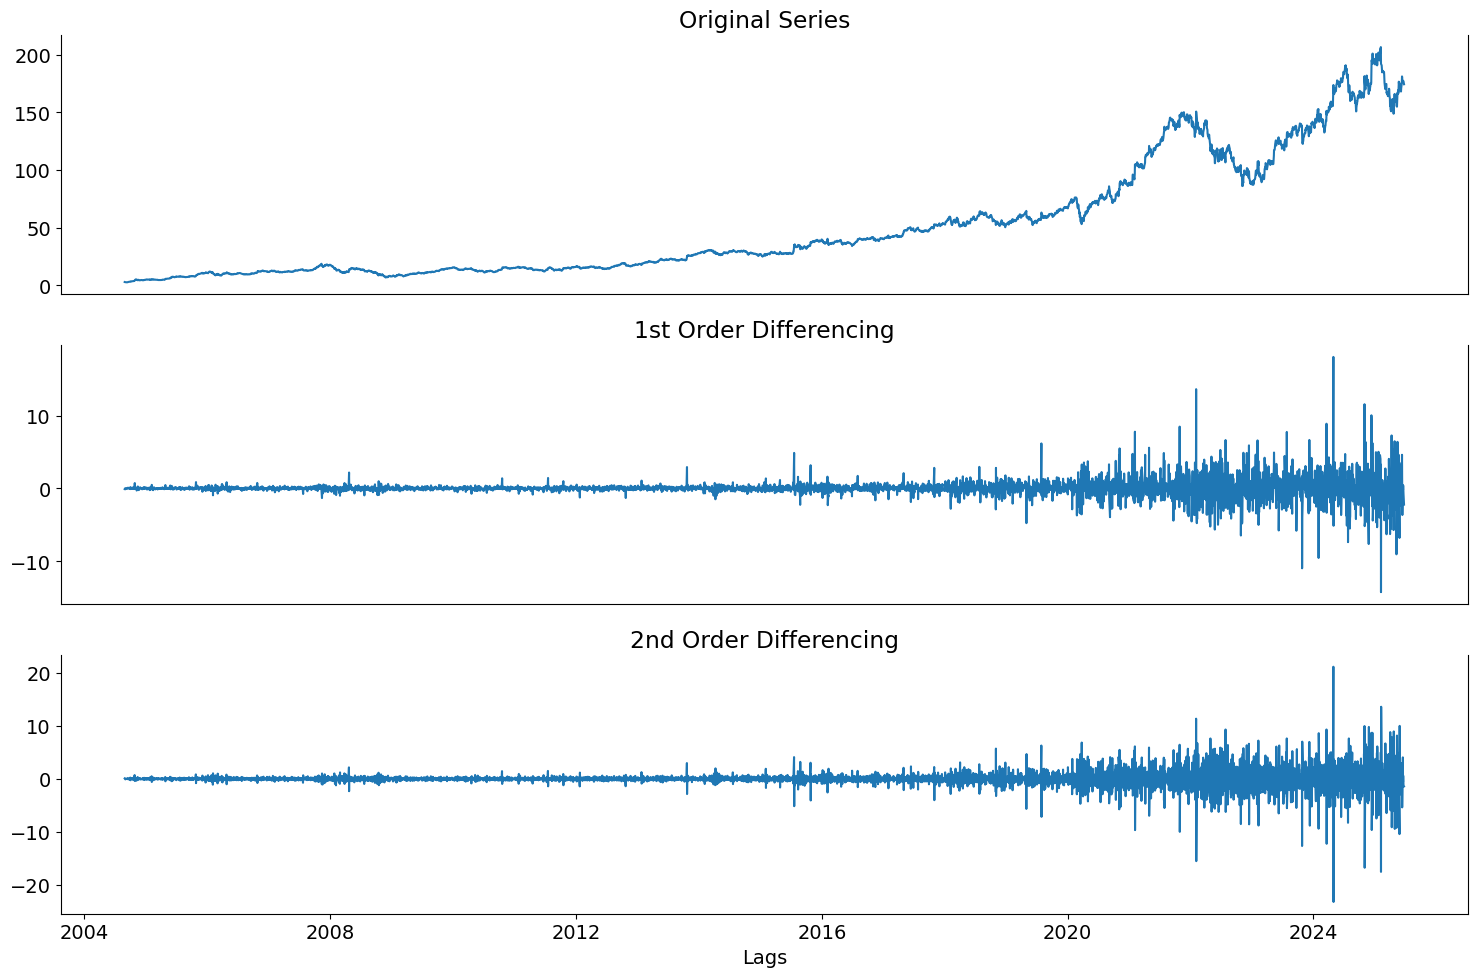

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
ax1.plot(df.High); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
ax1.spines['top'].set_visible(False)

# 1st Differencing
ax2.plot(df.High.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
ax2.spines['top'].set_visible(False)

# 2nd Differencing
ax3.plot(df.High.diff().diff()); ax3.set_title('2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.xlabel('Lags')
plt.tight_layout()
plt.show()


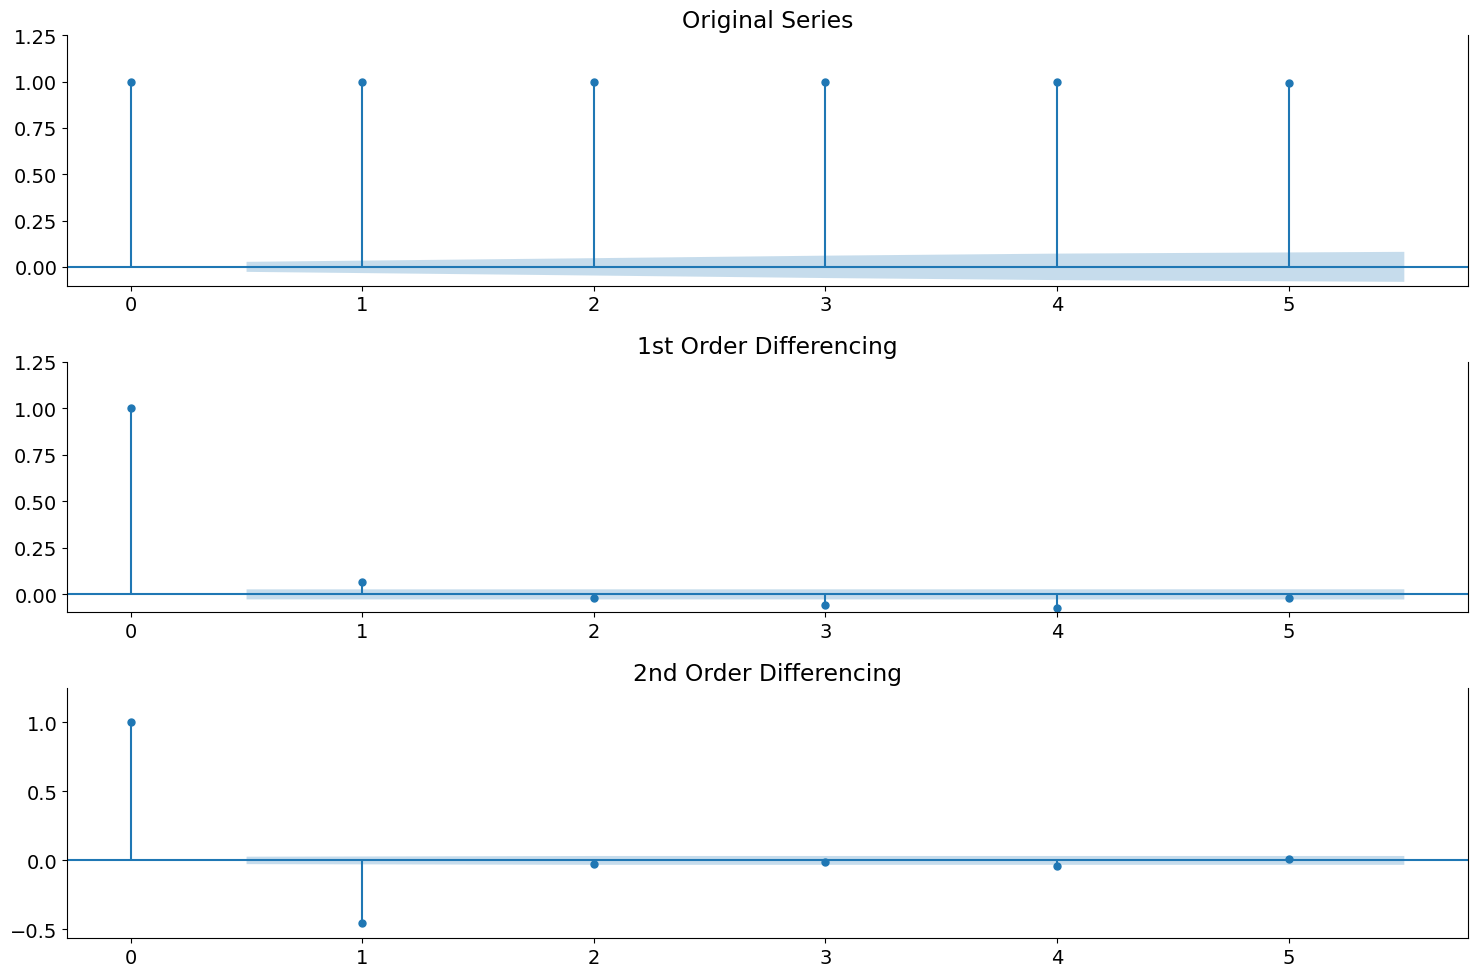

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
plot_acf(df.High, ax=ax1, auto_ylims=True, lags = 5,title = 'Original Series')
ax1.spines['top'].set_visible(False)

plot_acf(df.High.diff().dropna(), auto_ylims=True, lags = 5, ax=ax2,title = '1st Order Differencing')
ax2.spines['top'].set_visible(False)

plot_acf(df.High.diff().diff().dropna(), auto_ylims=True, lags = 5, ax=ax3, title= '2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

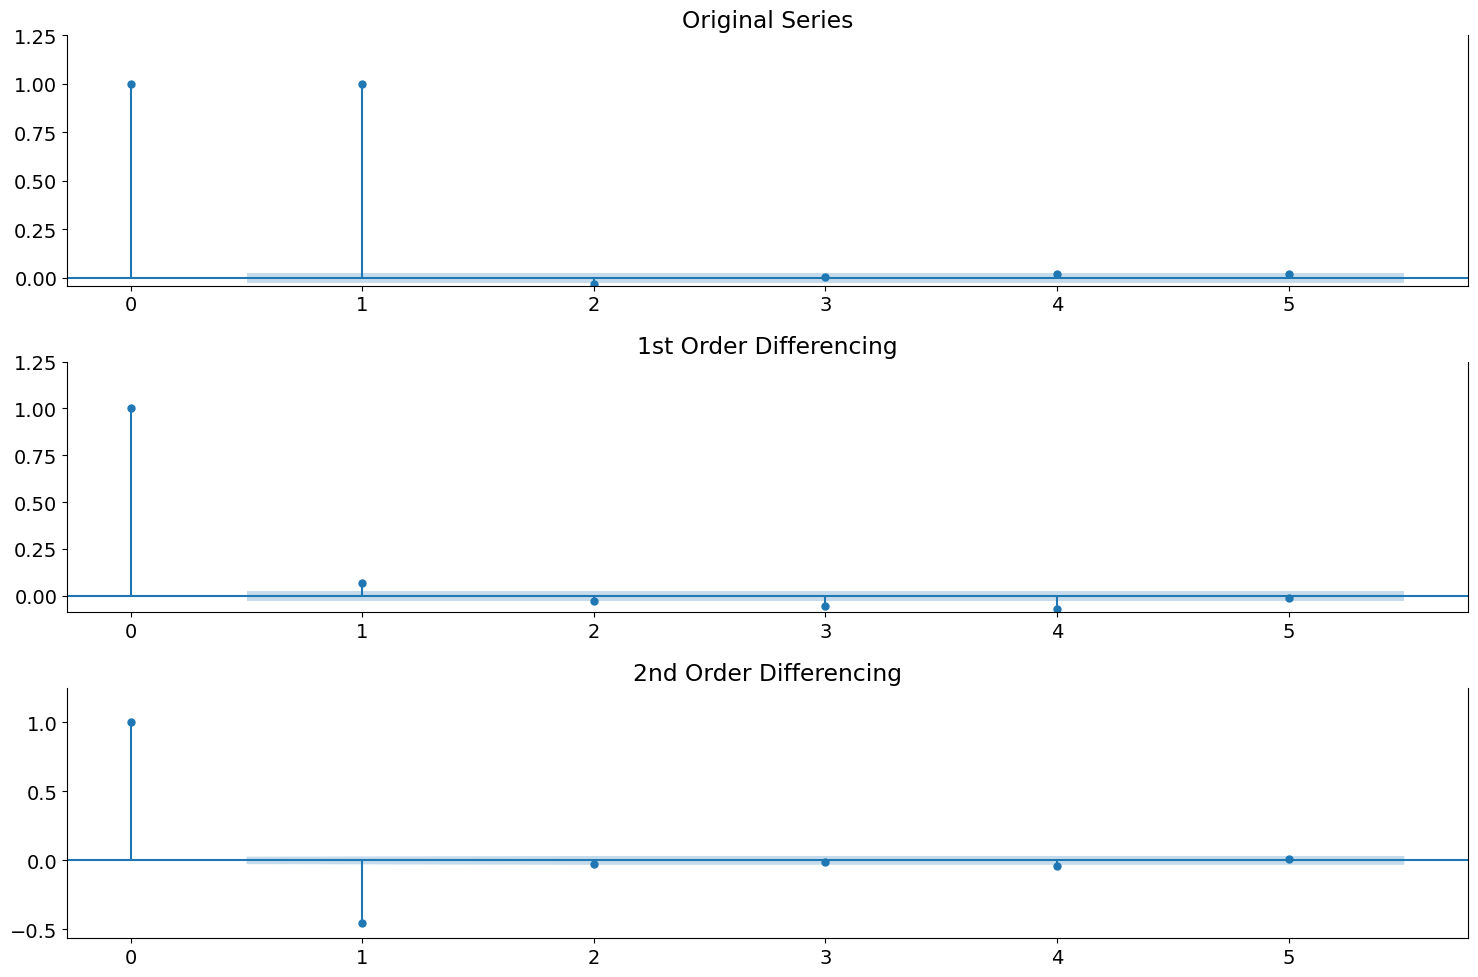

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
plot_pacf(df.High, auto_ylims=True, lags = 5, ax=ax1, title = 'Original Series')
ax1.spines['top'].set_visible(False)

plot_pacf(df.High.diff().dropna(),auto_ylims=True, lags =5, ax=ax2,title = '1st Order Differencing')
ax2.spines['top'].set_visible(False)

plot_acf(df.High.diff().diff().dropna(), auto_ylims=True, lags =5, ax=ax3, title= '2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
train = df[df.index.year<2020]
test = df[df.index.year>=2020]

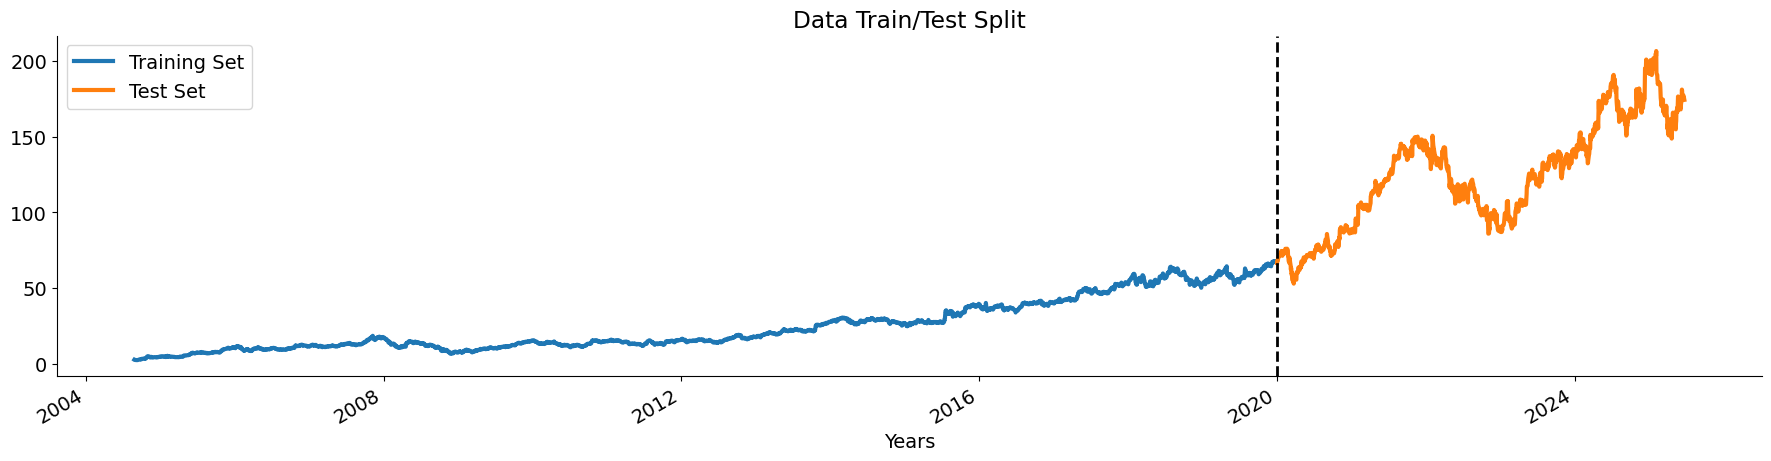

In [ ]:
fig, ax = plt.subplots()

# Plot the Volume column from the training set on the axis
train['High'].plot(ax=ax, label='Training Set', title='Data Train/Test Split', linewidth=3)

# Plot the Volume column from the test set on the axis
test['High'].plot(ax=ax, label='Test Set',  linewidth=3)

# Remove the top and right spines from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

# Add a vertical line to the plot at the threshold value
ax.axvline('2020-01-01', color='black', ls='--', lw=2)

# Add a legend to the plot
ax.legend(['Training Set', 'Test Set'])
# Label the x-axis
ax.set_xlabel('Years')

# Show the plot
plt.show()

In [ ]:
print(f'There are {train.shape[0]} rows in the training set and {test.shape[0]} rows in the test set')

There are 3865 rows in the training set and 1375 rows in the test set


In [ ]:
exogenous_features = ['Open', 'High', 'Low']
train = train[train.columns[:4]]
test = test[test.columns[:4]]

In [ ]:
train.head()

,Open,High,Low,Close
Date,,,,
2004-08-25 00:00:00-04:00,2.767188,2.776144,2.576391,2.608729
2004-08-26 00:00:00-04:00,2.610968,2.686591,2.584102,2.636839
2004-08-27 00:00:00-04:00,2.610719,2.685346,2.603505,2.684351
2004-08-30 00:00:00-04:00,2.689078,2.702013,2.629127,2.640569
2004-08-31 00:00:00-04:00,2.618928,2.624152,2.537584,2.537584


In [ ]:
import warnings
warnings.filterwarnings('ignore')
model = sm.tsa.arima.ARIMA(endog=train['Close'], exog=train[exogenous_features], order=(1, 1, 1))          #(p,d,q)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3865
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1791.711
Date:                Mon, 23 Jun 2025   AIC                          -3571.421
Time:                        15:02:02   BIC                          -3533.864
Sample:                             0   HQIC                         -3558.085
                               - 3865                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.5629      0.006    -96.445      0.000      -0.574      -0.551
High           0.7778      0.005    150.570      0.000       0.768       0.788
Low            0.7855      0.005    166.885      0.000       0.776       0.795
ar.L1         -0.0666      0.008     -7.850      0.000      -0.083      -0.050
ma.L1         -0.9999      0.009   -113.431      0.000      -1.017      -0.983
sigma2         0.0231      0.000     71.726      0.000       0.022       0.024
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):              9453.26
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               8.23   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train['Predictions'] = model_fit.predict()

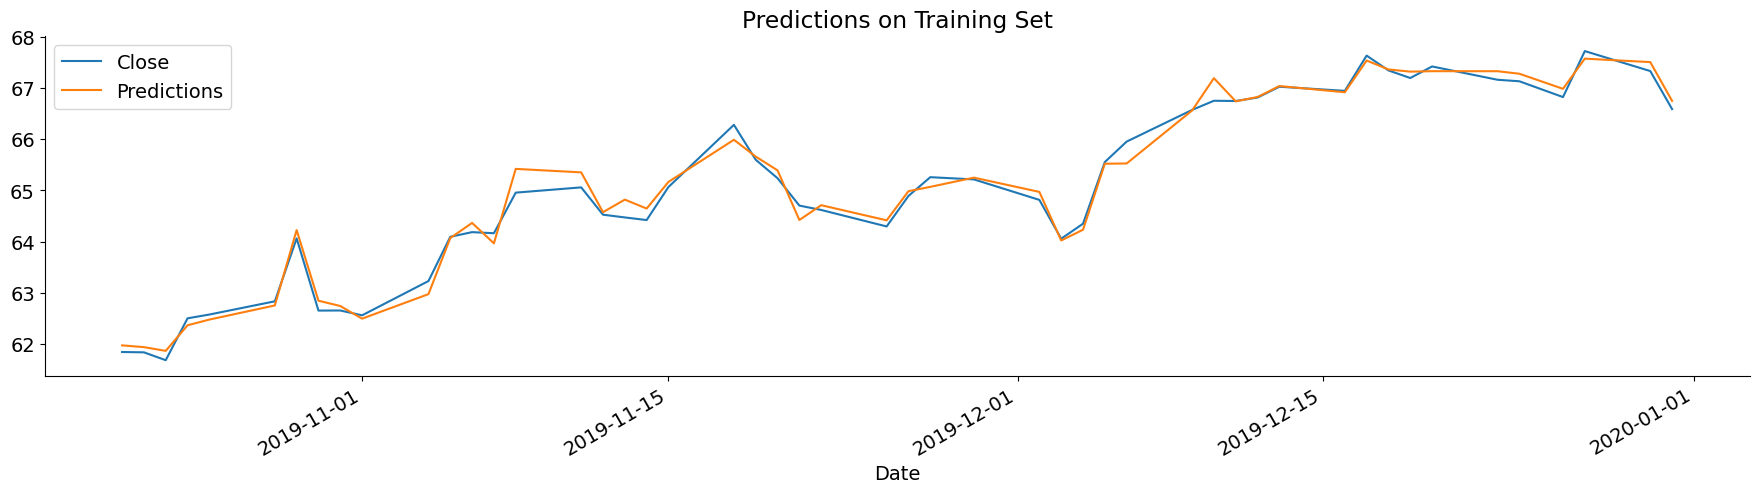

In [ ]:
train['Predictions'] = model_fit.predict()
train[['Close', 'Predictions']][-50:].plot()
plt.title('Predictions on Training Set')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [ ]:
forecast = [model_fit.forecast(exog=test[exogenous_features].iloc[i]).values[0] for i in range(len(test))]
test['Forecast'] = forecast

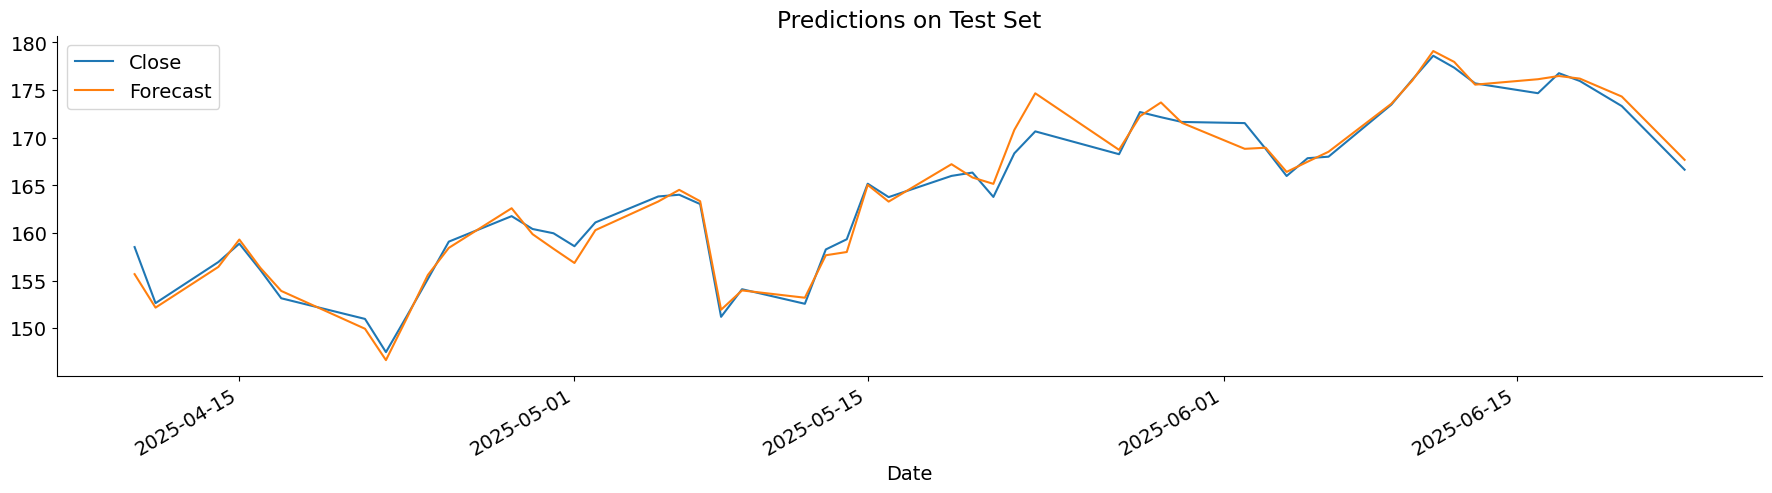

In [ ]:
test[['Close','Forecast']][-50:].plot()
plt.title('Predictions on Test Set')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Close'],test['Forecast']))
print(f'The RMSE for Multivariate ARIMAX is {round(rmse,4)}')

The RMSE for Multivariate ARIMAX is 0.8244
